In [3]:
import mysql.connector

# Buat koneksi ke MySQL server
connection = mysql.connector.connect(
    user='root',
    password='',
    host='localhost',  # Ganti dengan alamat server MySQL Anda
    database='sakila'
)


In [8]:
# Buat objek cursor
cursor = connection.cursor()

# Query SQL untuk mendapatkan daftar tabel dalam database
query = "SHOW TABLES"

# Jalankan query
cursor.execute(query)

# Mengambil hasil query
tables = cursor.fetchall()

# Menampilkan nama-nama tabel
for table in tables:
    print(table[0])

actor
actor_info
address
category
city
country
customer
customer_list
dimcustomer
dimdate
dimmovie
dimstore
fact_sales
film
film_actor
film_category
film_list
film_text
inventory
language
nicer_but_slower_film_list
payment
rental
sales_by_film_category
sales_by_store
staff
staff_list
store


In [16]:
import pandas as pd
# Query SQL yang diberikan
query = """
SELECT
    c.name AS category,
    COUNT(fs.sales_key) AS rental_count
FROM
    dimMovie AS mov
    JOIN film_category AS fc ON mov.movie_key = fc.film_id
    JOIN category AS c ON fc.category_id = c.category_id
    JOIN fact_sales AS fs ON mov.movie_key = fs.movie_key
GROUP BY
    category
ORDER BY
    rental_count DESC;
"""

# Mengambil data dari database ke dalam Pandas DataFrame
df = pd.read_sql_query(query, connection)

# Menampilkan data dalam bentuk tabel
print(df)

       category  rental_count
0        Sports          1179
1     Animation          1166
2        Action          1112
3        Sci-Fi          1101
4        Family          1096
5         Drama          1060
6   Documentary          1050
7       Foreign          1033
8         Games           969
9      Children           945
10       Comedy           941
11          New           940
12     Classics           939
13       Horror           846
14       Travel           837
15        Music           830


C:\Users\sulta\AppData\Local\Temp\ipykernel_19404\3130405748.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


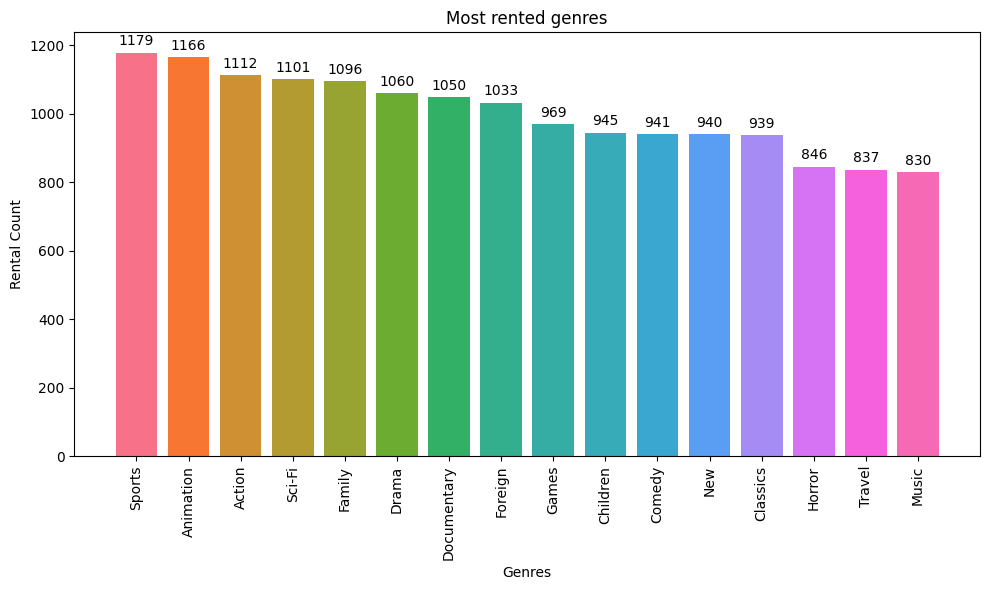

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Menyiapkan palet warna seaborn yang beragam
palette = sns.color_palette('husl', len(df['category']))

# Menampilkan data dalam bentuk histogram dengan warna yang beragam
plt.figure(figsize=(10, 6))
bars = plt.bar(df['category'], df['rental_count'], color=palette)
plt.xlabel('Genres')
plt.ylabel('Rental Count')
plt.title('Most rented genres')
plt.xticks(rotation=90)
plt.tight_layout()

# Menambahkan label pada batang
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Menampilkan plot
plt.show()

C:\Users\sulta\AppData\Local\Temp\ipykernel_19404\2998942438.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)
C:\Users\sulta\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sulta\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sulta\AppData\Roamin

Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

      Action       0.00      0.00      0.00       0.0
   Animation       0.00      0.00      0.00       1.0
 Documentary       0.00      0.00      0.00       0.0
       Drama       0.00      0.00      0.00       1.0
       Music       0.00      0.00      0.00       0.0
      Sports       0.00      0.00      0.00       1.0
      Travel       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0

Confusion Matrix:
[[0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]]


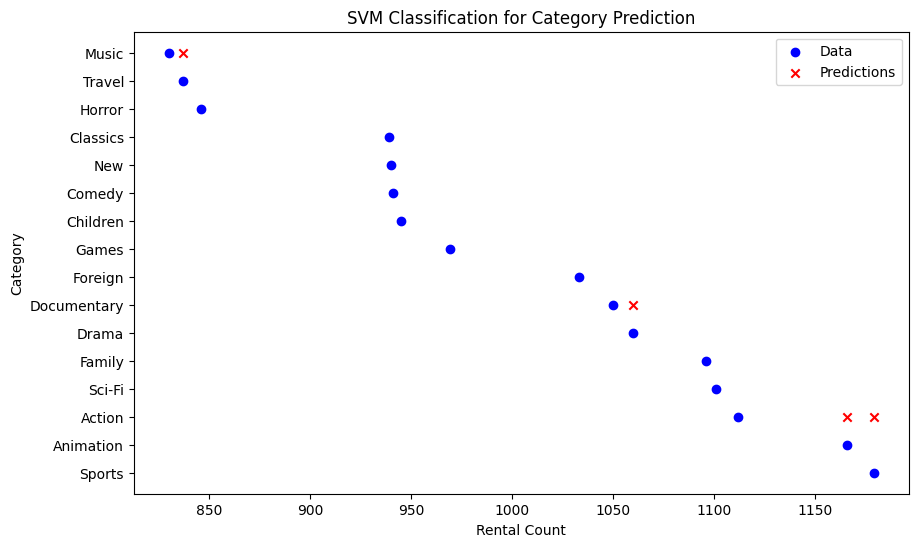

Predicted Category for new data: Music


In [25]:
import mysql.connector
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Buat koneksi ke MySQL server
connection = mysql.connector.connect(
    user='root',
    password='',
    host='localhost',  # Ganti dengan alamat server MySQL Anda
    database='sakila'
)

# Query SQL untuk mengambil data
query = """
SELECT
    c.name AS category,
    COUNT(fs.sales_key) AS rental_count
FROM
    dimMovie AS mov
    JOIN film_category AS fc ON mov.movie_key = fc.film_id
    JOIN category AS c ON fc.category_id = c.category_id
    JOIN fact_sales AS fs ON mov.movie_key = fs.movie_key
GROUP BY
    category
ORDER BY
    rental_count DESC;
"""

# Mengambil data dari database ke dalam Pandas DataFrame
df = pd.read_sql_query(query, connection)

# Preprocessing Data
# Memisahkan data menjadi fitur (X) dan target (y)
X = df[['rental_count']]
y = df['category']

# Memisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model SVM
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Prediksi dengan model
y_pred = model.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Menampilkan plot dari model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='b', marker='o', label='Data')
plt.scatter(X_test, y_pred, c='r', marker='x', label='Predictions')
plt.xlabel('Rental Count')
plt.ylabel('Category')
plt.title('SVM Classification for Category Prediction')
plt.legend()
plt.show()

# Prediksi Data Baru (Contoh)
new_data = pd.DataFrame({'rental_count': [100]})
predicted_category = model.predict(new_data)
print(f'Predicted Category for new data: {predicted_category[0]}')
